In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
import plotly.express as px
from sklearn.linear_model import LinearRegression
import json
import pickle
import re
import statsmodels.api as sm
from scipy.stats import skew

In [52]:
df = pd.read_csv('Life Expectancy Data.csv')
col_list = df.columns
col_list

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [53]:
col_list1 = list(map(lambda x : re.sub('[^A-Za-z0-9]','_',x.strip()),col_list))
col_list1

['Country',
 'Year',
 'Status',
 'Life_expectancy',
 'Adult_Mortality',
 'infant_deaths',
 'Alcohol',
 'percentage_expenditure',
 'Hepatitis_B',
 'Measles',
 'BMI',
 'under_five_deaths',
 'Polio',
 'Total_expenditure',
 'Diphtheria',
 'HIV_AIDS',
 'GDP',
 'Population',
 'thinness__1_19_years',
 'thinness_5_9_years',
 'Income_composition_of_resources',
 'Schooling']

In [54]:
df.columns=col_list1
df

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness__1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life_expectancy                  2928 non-null   float64
 4   Adult_Mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   Hepatitis_B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under_five_deaths                2938 non-null   int64  
 12  Polio               

In [13]:
df['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [56]:
df['Status'].replace({'Developing':1, 'Developed':2},inplace=True)
df['Status']

0       1
1       1
2       1
3       1
4       1
       ..
2933    1
2934    1
2935    1
2936    1
2937    1
Name: Status, Length: 2938, dtype: int64

In [57]:
df['Life_expectancy'].isna().sum()

10

In [58]:
df['Life_expectancy'].fillna(df['Life_expectancy'].mean(),inplace=True)

In [59]:
df['Adult_Mortality'].isna().sum()

10

<Axes: >

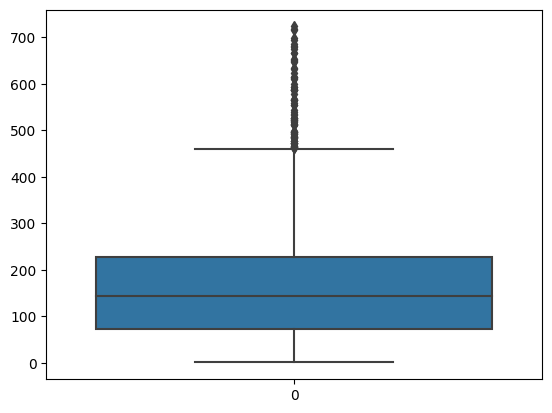

In [60]:
sns.boxplot(df['Adult_Mortality'])

In [61]:
df['Adult_Mortality'].fillna(df['Adult_Mortality'].mean(),inplace=True)

In [62]:
df['Alcohol'].isna().sum()

194

<Axes: >

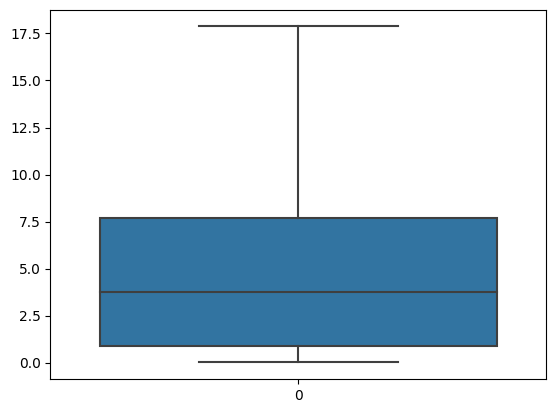

In [63]:
sns.boxplot(df['Alcohol'])

In [64]:
df['Alcohol'].fillna(df['Alcohol'].mean(),inplace=True)

In [65]:
df['Hepatitis_B'].isna().sum()

553

In [66]:
df['Hepatitis_B'].value_counts()

Hepatitis_B
99.0    240
98.0    210
96.0    167
97.0    155
95.0    149
       ... 
15.0      1
12.0      1
32.0      1
11.0      1
19.0      1
Name: count, Length: 87, dtype: int64

In [67]:
df['Hepatitis_B'].fillna(df['Hepatitis_B'].median(),inplace=True)

In [68]:
df['BMI'].isna().sum()

34

In [69]:
df['BMI'].value_counts()

BMI
58.5    18
55.8    16
57.0    16
54.2    15
59.9    15
        ..
7.6      1
72.8     1
74.1     1
74.6     1
33.9     1
Name: count, Length: 608, dtype: int64

<Axes: >

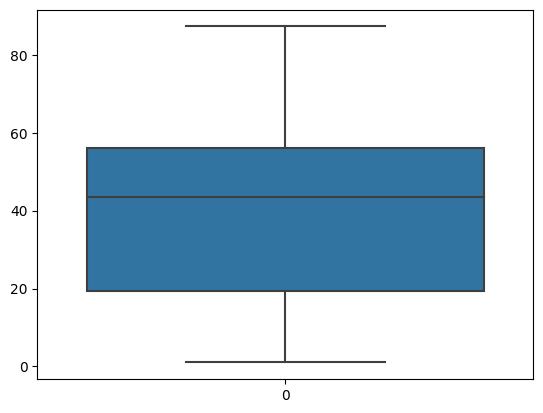

In [70]:
sns.boxplot(df['BMI'])

In [71]:
df['BMI'].fillna(df['BMI'].median(),inplace=True)

In [72]:
df['Polio'].isna().sum()

19

<Axes: >

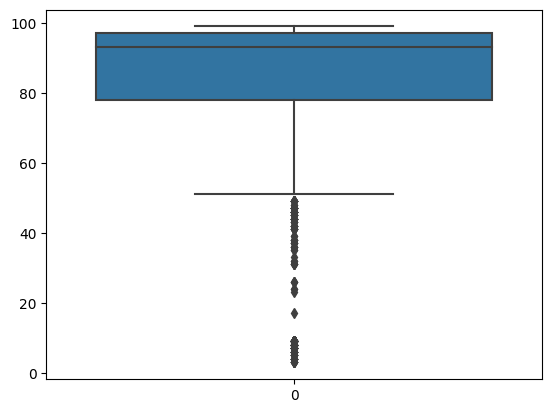

In [73]:
sns.boxplot(df['Polio'])

In [74]:
df['Polio'].fillna(df['Polio'].median(),inplace=True)

In [75]:
df['Total_expenditure'].isna().sum()

226

In [76]:
df['Total_expenditure'].fillna(df['Total_expenditure'].mean(),inplace=True)

In [77]:
df['Diphtheria'].value_counts()

Diphtheria
99.0    350
98.0    254
97.0    205
96.0    201
95.0    200
       ... 
16.0      1
56.0      1
21.0      1
19.0      1
27.0      1
Name: count, Length: 81, dtype: int64

<Axes: >

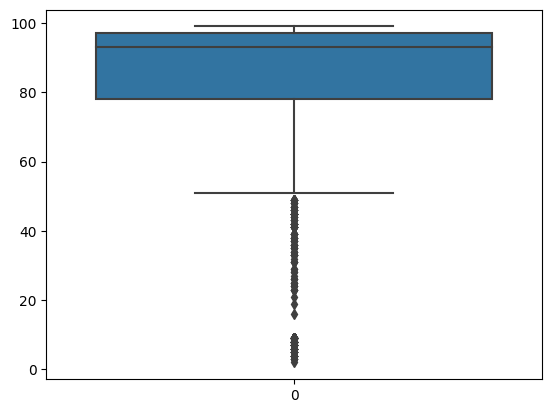

In [78]:
sns.boxplot(df['Diphtheria'])

In [79]:
df['Diphtheria'].fillna(df['Diphtheria'].mean(),inplace=True)

In [80]:
df['GDP'].value_counts()

GDP
584.259210     1
354.818600     1
358.997310     1
43.646498      1
416.148380     1
              ..
4274.376857    1
4142.869175    1
3725.632210    1
2964.477340    1
547.358878     1
Name: count, Length: 2490, dtype: int64

<Axes: >

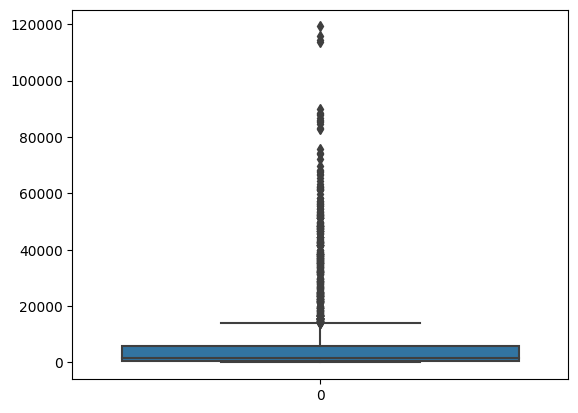

In [81]:
sns.boxplot(df['GDP'])

In [82]:
df['GDP'].fillna(df['GDP'].median(),inplace=True)

In [83]:
df['Population'].fillna(df['Population'].median(),inplace=True)

In [84]:
df['thinness__1_19_years'].value_counts()

thinness__1_19_years
1.0     74
1.9     65
0.8     64
0.7     63
1.2     62
        ..
16.5     1
16.7     1
16.9     1
17.1     1
15.8     1
Name: count, Length: 200, dtype: int64

<Axes: >

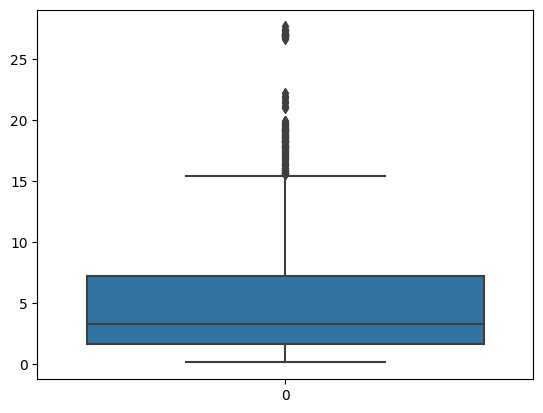

In [85]:
sns.boxplot(df['thinness__1_19_years'])

In [86]:
df['thinness__1_19_years'].fillna(df['thinness__1_19_years'].median(),inplace=True)

In [87]:
df['thinness_5_9_years'].fillna(df['thinness_5_9_years'].median(),inplace=True)

In [88]:
df['Income_composition_of_resources'].fillna(df['Income_composition_of_resources'].median(),inplace=True)

<Axes: >

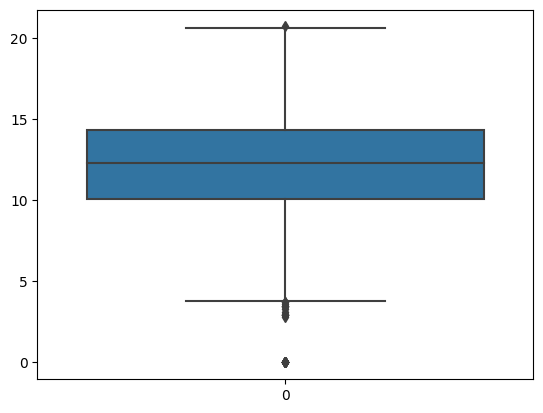

In [89]:
sns.boxplot(df['Schooling'])

In [90]:
df['Schooling'].fillna(df['Schooling'].mean(),inplace=True)

### Feature Selection

In [92]:
df.drop('Country', axis=1, inplace=True)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2938 non-null   int64  
 1   Status                           2938 non-null   int64  
 2   Life_expectancy                  2938 non-null   float64
 3   Adult_Mortality                  2938 non-null   float64
 4   infant_deaths                    2938 non-null   int64  
 5   Alcohol                          2938 non-null   float64
 6   percentage_expenditure           2938 non-null   float64
 7   Hepatitis_B                      2938 non-null   float64
 8   Measles                          2938 non-null   int64  
 9   BMI                              2938 non-null   float64
 10  under_five_deaths                2938 non-null   int64  
 11  Polio                            2938 non-null   float64
 12  Total_expenditure   

In [96]:
df.corr().iloc[2:3,:]

,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,...,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness__1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling
Life_expectancy,0.169623,0.481962,1.0,-0.696359,-0.196535,0.391598,0.381791,0.170555,-0.157574,0.555653,...,0.458449,0.207981,0.475418,-0.556457,0.430895,-0.028845,-0.467267,-0.461739,0.688425,0.715066


<Axes: >

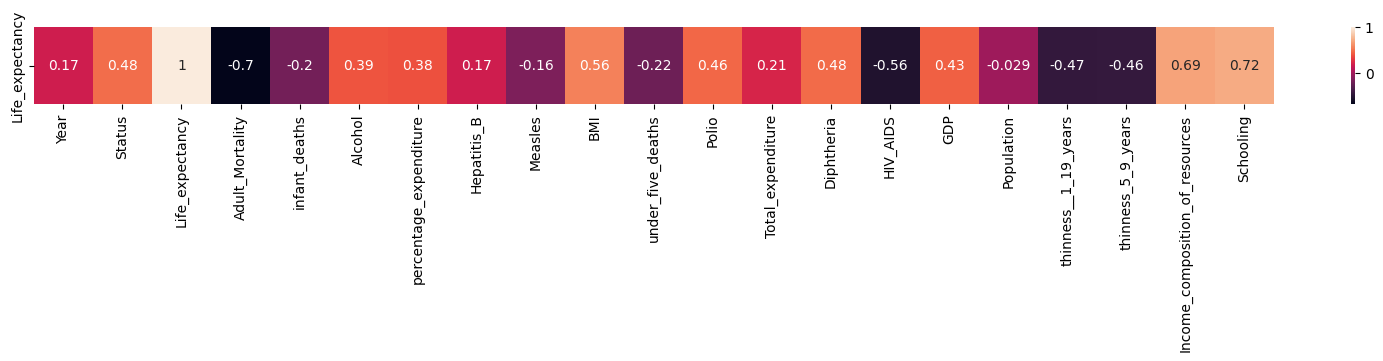

In [100]:
plt.figure(figsize=(20,1))
sns.heatmap(df.corr().iloc[2:3,:],annot=True)

In [102]:
x = df.drop('Life_expectancy',axis=1)
x

,Year,Status,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness__1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling
0,2015,1,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,1,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,1,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,1,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,1,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,1,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,2003,1,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,2002,1,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,2001,1,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [103]:
vif_index=[]
for i in range(x.shape[1]):
    vif_index.append(variance_inflation_factor(x,i))
vif_index

[66.49373890913077,
 19.86686045612367,
 4.801036957432244,
 188.81659641472496,
 4.383633307320453,
 6.541985269816307,
 18.405426280068795,
 1.439613260905642,
 8.104892333676158,
 188.14994584827792,
 26.064107784834178,
 8.572553327064513,
 28.407165084106616,
 1.5898003756343153,
 7.438447486690681,
 1.5437955572068176,
 19.326743206903803,
 19.260788332112096,
 31.235400818976114,
 47.85066932286601]

In [104]:
y=df['Life_expectancy']

### Model Training

In [105]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)
x_train.shape

(2350, 20)

In [106]:
lin_reg = LinearRegression()

In [107]:
lin_reg.fit(x_train,y_train)

LinearRegression()

In [108]:
y_pred_test = lin_reg.predict(x_test)
y_pred_test

array([78.1666095 , 55.57836862, 75.12799613, 79.85699332, 60.18366578,
       79.88211664, 63.41721012, 70.36730382, 60.50026742, 74.62930116,
       72.09570156, 75.69003213, 70.83297849, 62.82098746, 80.39021786,
       69.79084295, 73.55774946, 80.537489  , 73.50527318, 71.79170765,
       72.20980382, 60.31519946, 76.54431755, 77.17886469, 66.86752484,
       68.75087256, 82.57359837, 81.74609131, 76.9854409 , 64.94411247,
       78.15330551, 81.28384043, 80.30158049, 61.02569247, 72.77145988,
       79.45775005, 83.14229162, 63.78988997, 62.24808677, 70.43901739,
       75.7621909 , 67.41725331, 67.73553551, 66.25946152, 72.28740783,
       83.33443181, 77.81409933, 71.06894448, 77.35858794, 75.5739784 ,
       71.16325025, 48.6470743 , 71.36001714, 78.06539109, 82.625809  ,
       74.637756  , 68.48010176, 61.6695354 , 65.13371069, 61.89013145,
       49.20600341, 73.84025441, 68.36565775, 60.58219636, 77.05986823,
       66.84719216, 71.03819987, 61.6029056 , 76.1163736 , 78.60

In [109]:
y_pred_train = lin_reg.predict(x_train)
y_pred_train

array([60.07340012, 71.60944673, 76.57545362, ..., 72.94712351,
       54.82032857, 79.57710984])

In [110]:
residual_test = y_test - y_pred_test
mse_test = mean_squared_error(y_test,y_pred_test)
print('mean_squared_error on testing data : ',mse_test  )
rmse_test = np.sqrt(mse_test)
print('Root mean_squared_error on testing data : ',rmse_test  )
mae_test = mean_absolute_error(y_test,y_pred_test)
print('mean_absolute_error on testing data : ',mae_test  )
r2_score_test = r2_score(y_test,y_pred_test)
print('r2_score on testing data : ',r2_score_test  )
adj_r2_test = 1 - (((x.shape[0]-1)*(1-r2_score_test)) / (x.shape[0]-x.shape[1]-1))
print('adjusted r2_score on testing data : ',adj_r2_test )


mean_squared_error on testing data :  15.408378566812882
Root mean_squared_error on testing data :  3.9253507571697184
mean_absolute_error on testing data :  2.9013400031420824
r2_score on testing data :  0.8275721151315434
adjusted r2_score on testing data :  0.8263898876041629


In [111]:
residual_train = y_train - y_pred_train
mse_train = mean_squared_error(y_train,y_pred_train)
print('mean_squared_error on testing data : ',mse_train  )
rmse_train = np.sqrt(mse_train)
print('Root mean_squared_error on testing data : ',rmse_train  )
mae_train = mean_absolute_error(y_train,y_pred_train)
print('mean_absolute_error on testing data : ',mae_train  )
r2_score_train = r2_score(y_train,y_pred_train)
print('r2_score on testing data : ',r2_score_train  )
adj_r2_train = 1 - (((x.shape[0]-1)*(1-r2_score_train)) / (x.shape[0]-x.shape[1]-1))
print('adjusted r2_score on testing data : ',adj_r2_train )

mean_squared_error on testing data :  16.523984291481785
Root mean_squared_error on testing data :  4.064970392448362
mean_absolute_error on testing data :  3.0342215122454665
r2_score on testing data :  0.8176417050517415
adjusted r2_score on testing data :  0.8163913910651234


### Residual distribution

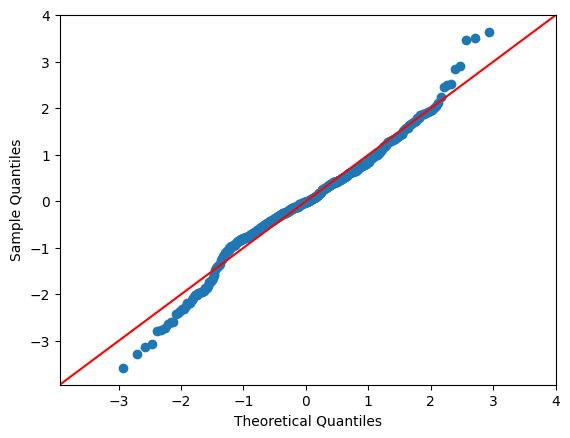

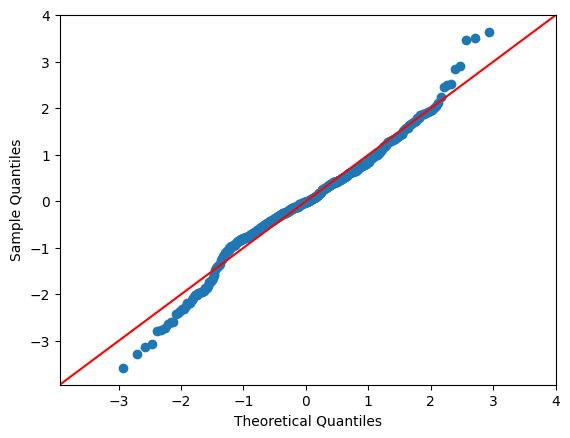

In [115]:
sm.qqplot(residual_test,line='45',fit = True)

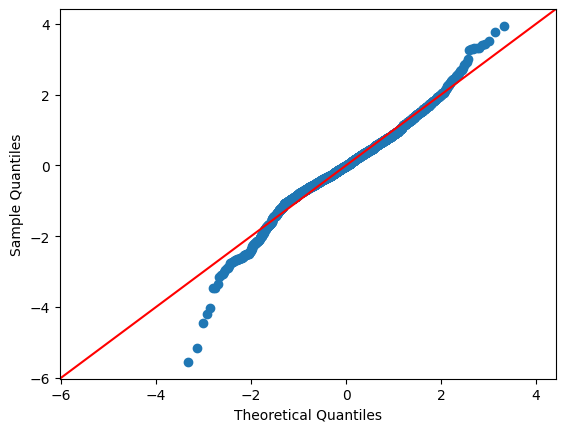

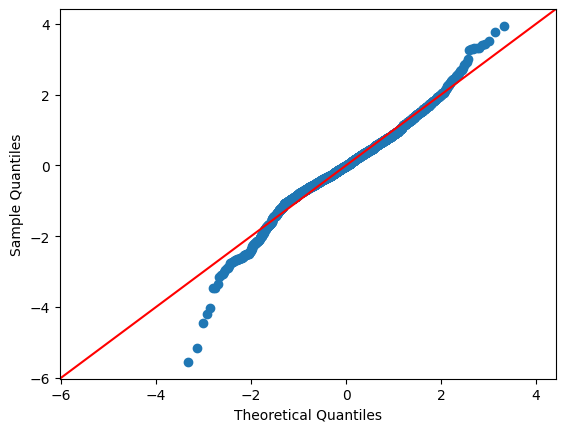

In [116]:
sm.qqplot(residual_train,line='45',fit = True)

In [123]:
skew(residual_test)

-0.16184132693849615

In [124]:
skew(residual_train)

-0.24486881634236585

<Axes: xlabel='Life_expectancy', ylabel='Density'>

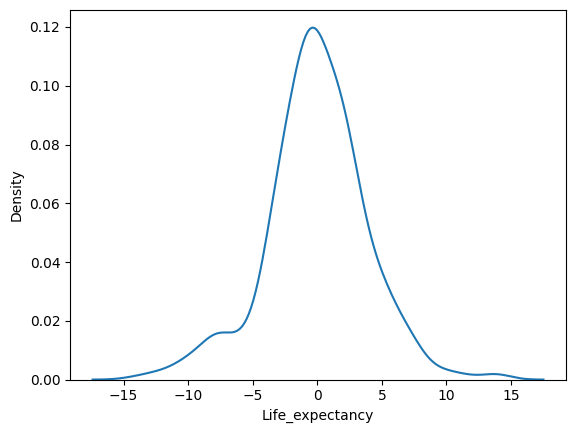

In [125]:
sns.kdeplot(residual_test)

<Axes: xlabel='Life_expectancy', ylabel='Density'>

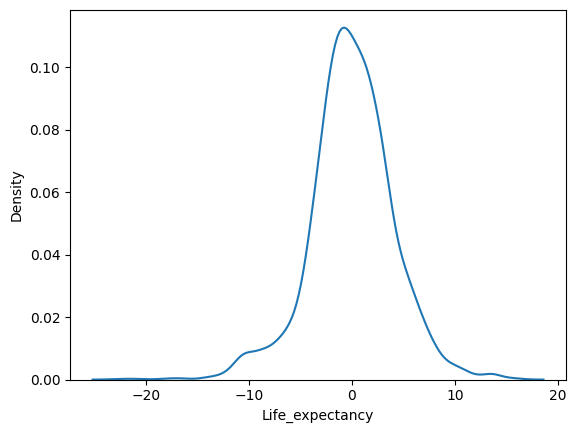

In [126]:
sns.kdeplot(residual_train)

### homoskedasticity

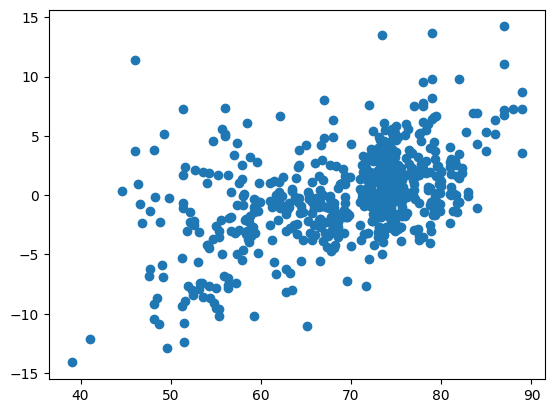

In [128]:
plt.scatter(y_test,residual_test)

In [130]:
with open('Linear_reg_life_expectancy.pkl','wb') as f:
    pickle.dump(lin_reg,f)

In [131]:
json_data = {'Status' : {'Developing':1, 'Developed':2}}

In [132]:
with open('jason_data.json','w') as f:
    json.dump(json_data,f)